In [1]:
import pandas as pd
from plot_utils import *

In [80]:
green="#2ca25f"
dg = '#303030'

In [2]:
! ls ../logs

chexpert_mobilenet_width_depths.csv rsna_mobilenet_widths_depths.csv
chexpert_resnet_widths_depths.csv   rsna_resnet_widths_depths.csv
chexpertresnet_depthwise.csv


In [3]:
def aggregating_results(df):
    grouped = df.groupby(['params'])
    result = pd.DataFrame(grouped['val_score'].agg(['mean', 'min', 'max']).reset_index())
    return result

In [81]:
def plot_experiment(df, ax, text):
    x = df["params"]
    y = df["mean"]
    y1 = df["min"]
    y2 = df["max"]
    ax.plot(x, y, color=green)
    ax.scatter(x, y, marker='|', color=green, s=10)
    ax.fill_between(x, y1, y2, color=dg, alpha=.1) 
    ax.text(x.max() + 100000, y.max(), text, horizontalalignment='left', fontsize=16, color=green)

### Resnet widths_depths

In [82]:
files = ["chexpert_resnet_widths_depths.csv", "rsna_resnet_widths_depths.csv"]

In [83]:
dfs[0].params.values

array([ 3329749,  3334421,  3352981,  3403733,  3408405,  3426965,
        4905893,  4924453,  4998437,  5201317,  5219877,  5293861,
        7093365,  7135029,  7301301,  7757685,  7799349,  7965621,
        9628997,  9702981,  9998405, 10809669, 10883653, 11179077])

In [84]:
params = dfs[0].params.values
T = [params[i] for i in [0, 7, 13, 19, 23]]

In [88]:
S = ["3.3M", "4.9M", "7.1M", "9.7M", "11.2M"]

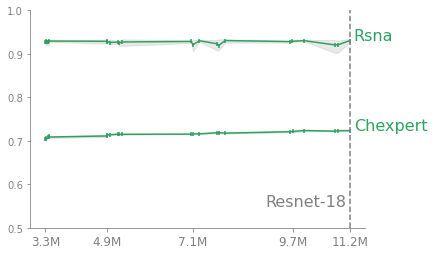

In [92]:
dfs = [pd.read_csv("../logs/" + f) for f in files]
dfs = [aggregating_results(df) for df in dfs]
texts = ["Chexpert", "Rsna"]
fig, ax = plt.subplots()
clean_axis(ax)
for i in range(0, len(dfs)):
    plot_experiment(dfs[i], ax, texts[i])
ax.set_xticks(T)
ax.set_xticklabels(S, color=lg, fontsize=12)
plt.axvline(x=11179077, color=lg, linestyle='--')
ax.text(11179077 - 100000, 0.55, "Resnet-18", horizontalalignment='right', fontsize=16, color=lg)
plt.savefig('resnet_widths_depths.png', bbox_inches='tight')
plt.show()